In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
level_sensor_column_name = '.........Data e Hora..........Nível (cm)'
rain_sensor_column_name = '.........Data e Hora..........Chuva (mm)'

In [5]:
def get_df_from_txt(filename, header, target):
    df = pd.read_table(filename)
    df_info = df[header].str.split('                 ')
    df['data'] = df_info.str.get(0).transform(lambda x: x.strip())
    df[target] = df_info.str.get(1)
    df[target] = pd.to_numeric(df[target], errors='coerce').astype('Float64')
    df.drop(header, inplace=True, axis=1)
    return df

In [6]:
# Taió
rain_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-chuva.txt', rain_sensor_column_name, 'rain_taio')
river_level_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-nível.txt', level_sensor_column_name, 'river_level_taio')

In [7]:
# Ituporanga
rain_ituporanga = get_df_from_txt('83250000ITUPORANGA_3172005-1442014-chuva.txt', rain_sensor_column_name, 'rain_ituporanga')
river_level_ituporanga = get_df_from_txt('83250000ITUPORANGA_2962005-1032014-nível.txt', level_sensor_column_name, 'river_level_ituporanga')

In [8]:
# Rio do Sul
river_level_rio_do_sul = get_df_from_txt('83300200RIODOSUL-NOVO_2982005-1422014 -nível.txt', level_sensor_column_name, 'river_level_rio_do_sul')

In [9]:
df = pd.merge(rain_taio, river_level_taio, how = 'outer')
df = pd.merge(df, rain_ituporanga, how = 'outer')
df = pd.merge(df, river_level_ituporanga, how = 'outer')
df = pd.merge(df, river_level_rio_do_sul, how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138231 entries, 0 to 138230
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data                    138231 non-null  object 
 1   rain_taio               122983 non-null  Float64
 2   river_level_taio        107276 non-null  Float64
 3   rain_ituporanga         114151 non-null  Float64
 4   river_level_ituporanga  83710 non-null   Float64
 5   river_level_rio_do_sul  116938 non-null  Float64
dtypes: Float64(5), object(1)
memory usage: 8.0+ MB


In [10]:
df.head(5)

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
0,29/06/2005 00:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
1,29/06/2005 01:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
2,29/06/2005 02:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
3,29/06/2005 03:00:00,<NA>,110.0,<NA>,<NA>,107.0
4,29/06/2005 04:00:00,<NA>,<NA>,<NA>,<NA>,108.0


In [11]:
df = df.dropna(how='any')  
df

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
678,31/07/2005 21:00:00,0.0,98.0,3.0,30.0,171.0
679,31/07/2005 22:00:00,0.0,98.0,12.0,39.0,171.0
680,31/07/2005 23:00:00,0.0,97.0,19.0,59.0,171.0
681,01/08/2005 00:00:00,0.0,97.0,5.0,82.0,170.0
684,01/08/2005 03:00:00,0.0,97.0,1.0,27.0,170.0
...,...,...,...,...,...,...
130388,24/02/2014 15:30:00,0.0,142.0,0.0,87.0,174.0
130419,25/02/2014 01:15:00,0.0,152.0,0.0,54.0,180.0
130421,25/02/2014 01:45:00,0.0,152.0,0.0,54.0,179.0
130424,25/02/2014 02:30:00,0.0,151.0,0.0,54.0,178.0


In [12]:
df.corr()

,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
rain_taio,1.000000,0.007924,0.211639,0.018613,0.003362
river_level_taio,0.007924,1.000000,0.032540,0.802609,0.944459
rain_ituporanga,0.211639,0.032540,1.000000,0.063285,0.040768
river_level_ituporanga,0.018613,0.802609,0.063285,1.000000,0.886184
river_level_rio_do_sul,0.003362,0.944459,0.040768,0.886184,1.000000


In [13]:
df.corr().loc['river_level_rio_do_sul'].sort_values(ascending=False)

river_level_rio_do_sul    1.000000
river_level_taio          0.944459
river_level_ituporanga    0.886184
rain_ituporanga           0.040768
rain_taio                 0.003362
Name: river_level_rio_do_sul, dtype: float64

In [14]:
x = df[['river_level_taio', 'river_level_ituporanga', 'rain_ituporanga']]
y = df[['river_level_rio_do_sul']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53569, 3)
(13393, 3)
(53569, 1)
(13393, 1)


In [16]:
linear_regression = LinearRegression()

In [17]:
linear_regression.fit(x_train.values, y_train.values)

LinearRegression()

In [18]:
linear_regression.predict([[573, 114, 0.8]])

array([[479.34206553]])

In [19]:
predict_values = linear_regression.predict(x_test)

/home/xavier/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/xavier/.local/lib/python3.8/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


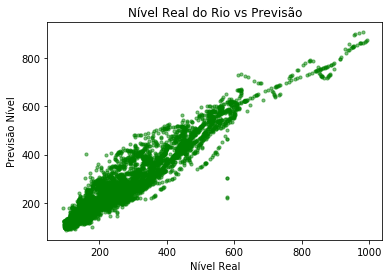

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predict_values, s=10, c= ['green'], alpha=0.5)

plt.xlabel("Nível Real")
plt.ylabel("Previsão Nível")
plt.title("Nível Real do Rio vs Previsão")

plt.show()

In [21]:
from sklearn.metrics import r2_score 

R2 = r2_score(y_test,predict_values)
print(R2)

0.9364255154335389


/home/xavier/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [39]:
MAPE = np.mean(np.abs((y_test - predict_values) / y_test)) * 100

print("Valor do MAPE %.2f" %MAPE+"%")

Valor do MAPE 8.83%


/home/xavier/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
